In [2]:
# import any necessary packages

import os
import pandas as pd
import numpy as np
from sktime.forecasting.all import *

# need to import the sktime utils


ModuleNotFoundError: No module named 'sktime'

In [22]:
# check current working directory
print(os.getcwd())

/Users/kavinanand/Desktop/mlh/MLHFellowshipWarmup/scrap_notebook


In [3]:
df = pd.read_csv(os.getcwd() + "/../data/sleepdata.csv")
df

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0
...,...,...,...,...,...,...,...,...
882,2018-02-12 21:54:14,2018-02-13 07:02:15,91%,9:08,NaN,NaN,NaN,56
883,2018-02-13 23:49:19,2018-02-14 07:00:53,81%,7:11,NaN,NaN,NaN,64
884,2018-02-14 21:24:05,2018-02-15 06:20:52,71%,8:56,NaN,NaN,NaN,3316
885,2018-02-15 21:36:32,2018-02-16 06:50:31,80%,9:13,NaN,NaN,NaN,6555


In [9]:
# remove sleep notes, heart rate and activity, and for now, Wake up emoji
list(df)

['Start',
 'End',
 'Sleep quality',
 'Time in bed',
 'Wake up',
 'Sleep Notes',
 'Heart rate',
 'Activity (steps)']

In [10]:
df = df.drop('Heart rate', 1)
df = df.drop('Activity (steps)', 1)
df = df.drop('Sleep Notes', 1)
df = df.drop('Wake up', 1)
df = df.drop('End', 1)

In [12]:
df

,Start,Sleep quality,Time in bed
0,2014-12-29 22:57:49,100%,8:32
1,2014-12-30 21:17:50,3%,0:16
2,2014-12-30 22:42:49,98%,8:30
3,2014-12-31 22:31:01,65%,7:32
4,2015-01-01 22:12:10,72%,6:44
...,...,...,...
882,2018-02-12 21:54:14,91%,9:08
883,2018-02-13 23:49:19,81%,7:11
884,2018-02-14 21:24:05,71%,8:56
885,2018-02-15 21:36:32,80%,9:13


In [13]:
# chop sleep quality percentages to range between 0 and 10
def truncate_percentage_to_range(x):
    x = x.strip('%')
    x = int(x) / 10.0
    return x

def time_to_minutes(x):
    s = x.split(":")
    s = int(s[0]) * 60 + int(s[1])
    return s

def extract_date(x):
    s = x.split(" ")
    return s[0]

df['Sleep quality'] = df['Sleep quality'].apply(truncate_percentage_to_range)
df['Time in bed'] = df['Time in bed'].apply(time_to_minutes)
df['Start'] = df['Start'].apply(extract_date)
df = df.rename(columns={'Start':'Date'})

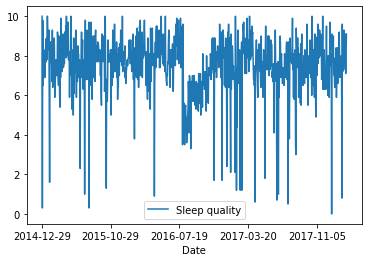

In [14]:
# Plot the data over the dates
# At first glance, we have 887 rows starting in 2014. 887 / 365 is approx 2.4 years,
# but technically this data set spans from the beginning of 2015 to the beginning of 2018,
# a time of over 3 years. There's definetly some gaps.
df.plot(x="Date", y = "Sleep quality")

In [20]:
user_df = pd.read_csv(os.getcwd() + "/../test/test_inputs/sample_7_days.csv")
user_df["Time in bed"] = 60 * user_df["Time in bed"]
user_df

,Date,Sleep quality,Time in bed
0,2021-01-29,7,420
1,2021-01-30,6,420
2,2021-01-31,7,360
3,2021-02-01,7,420
4,2021-02-02,6,420
5,2021-02-03,0,180
6,2021-02-04,8,540


In [21]:
# frames = [df, user_df]
# result = pd.concat(frames, ignore_index=True)
result = df.append(user_df)
result

,Date,Sleep quality,Time in bed
0,2014-12-29,10.0,512
1,2014-12-30,0.3,16
2,2014-12-30,9.8,510
3,2014-12-31,6.5,452
4,2015-01-01,7.2,404
...,...,...,...
2,2021-01-31,7.0,360
3,2021-02-01,7.0,420
4,2021-02-02,6.0,420
5,2021-02-03,0.0,180


In [17]:
list(result)

['Date', 'Sleep quality', 'Time in bed']